# Linear regression using Gluon API

In this example we will implement the linear regression using Gluon API. We will take advantage of hybrid deep learning programming style to define compute gaph and execute that.

` Powerful ML libraries can eliminate repetitive work `

In this example we are not developing each and everything from scratch but we will take advantage of gluon API to form our implementation


In [44]:
# let us import the packages 

import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
# this is for nural layers
from mxnet.gluon import nn, Trainer
# this is for data loading
from mxnet.gluon.data import DataLoader, ArrayDataset

## Set the context
We want to inform gluon where need to do opimisation by setting context.
After context set we will generate a random dataset

In [45]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

number_inputs = 2
number_outputs = 1
number_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape=(number_examples, number_inputs))
noise = 0.01 * nd.random_normal(shape=(number_examples,))
y = real_fn(X) + noise

As we have learned in the neural network basics. To tune the neural network and get fine grain output from that we need some hyper parameter.


In [46]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                      batch_size=batch_size, shuffle=True)

To work with data as above we imported two packages DataLoader and ArrayDataset(DataSet). this two module will help us to load the data. And we will create two set out of that one is to train the network and another one is for testing.

Data is ready now define the Neural network. Let us build Neural network with two input and one output layer as we defined this using nn.Dense(1, in_units=2)

In [47]:
net = gluon.nn.Dense(1, in_units=2)

In [48]:
print(net.weight)
print(net.bias)

Parameter dense6_weight (shape=(1, 2), dtype=float32)
Parameter dense6_bias (shape=(1,), dtype=float32)


In [49]:
net.collect_params()
type(net.collect_params())

net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)
example_data = nd.array([[4,7]])
net(example_data)



[[-0.3322528]]
<NDArray 1x1 @cpu(0)>

In [50]:
print(net.weight.data())
print(net.bias.data())
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)


[[ 0.9486392  -0.58954424]]
<NDArray 1x2 @cpu(0)>

[0.]
<NDArray 1 @cpu(0)>


In [51]:
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)
square_loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.0001})

In [52]:
epochs = 10
loss_sequence = []
num_batches = num_examples / batch_size

for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.mean(loss).asscalar()
    print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
    loss_sequence.append(cumulative_loss)

Epoch 0, loss: 2.613654967737198
Epoch 1, loss: 1.5843025568589568
Epoch 2, loss: 0.9603701754279435
Epoch 3, loss: 0.5821674839012325
Epoch 4, loss: 0.3529122672762722
Epoch 5, loss: 0.2139420425374061
Epoch 6, loss: 0.1297012088945834
Epoch 7, loss: 0.07863403663830831
Epoch 8, loss: 0.04767657644506544
Epoch 9, loss: 0.028909445878909902


Text(0, 0.5, 'average loss')

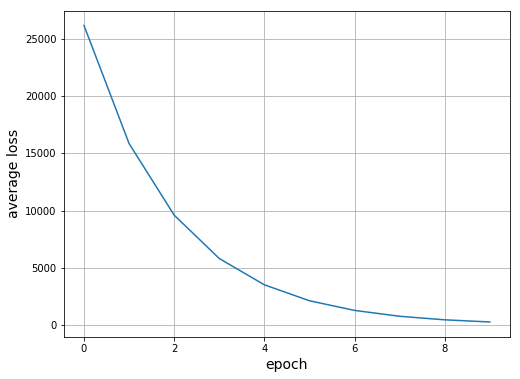

In [53]:
# plot the convergence of the estimated loss function
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)

In [58]:
params = net.collect_params() # this returns a ParameterDict

print('The type of "params" is a ',type(params))

# A ParameterDict is a dictionary of Parameter class objects
# therefore, here is how we can read off the parameters from it.

for param in params.values():
    print(param.name,param.data())

The type of "params" is a  <class 'mxnet.gluon.parameter.ParameterDict'>
dense8_weight 
[[ 1.8592578 -3.1953301]]
<NDArray 1x2 @cpu(0)>
dense8_bias 
[3.859117]
<NDArray 1 @cpu(0)>
